<a href="https://colab.research.google.com/github/bloomfieldfong/Ciencia-de-datos/blob/main/Proyecto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file = "proyecto_training_data.npy"
data = np.load(file, mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')
data = pd.DataFrame(data)


Separacion de datos de entrenamiento y de pruebas


In [ ]:
##Separacion de la data en 80% y 20%    
training_data = data.loc[0:1168]
test_data = data.loc[1167:1460]


# **Analisis exploratorio**

Se establecio un correlativo para cada una de las columnas de nuestro data frame:

* 0 SalesPrice 
* 1 OverallQual
* 2 1stFlrSF (First Floor square feet) 
* 3 TotRmsAbvGrd 
* 4 YearBuilt 
* 5 LotFrontage

# **Mapa de correlación**

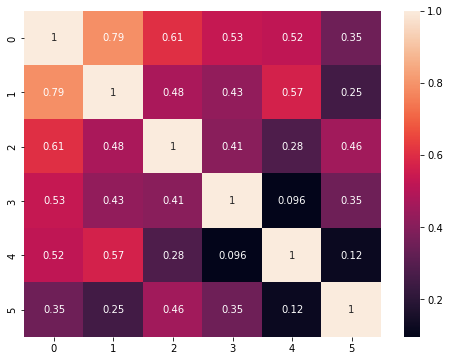

In [2]:
correlation_table = data.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_table, annot=True)
plt.show()

Se realizo un mapa de calor de los valores de correlación para saber que datos tienen mayor correlación con la variable que queremos predecir. En este caso vemos la columna 0 ya que nuestra predicción estara entorno a la variable SalesPrice

# **Medias de las variables**

In [21]:
print("Media de SalesPrice: "+str(data[0].mean()))
print("Media de OverallQual: "+str(data[1].mean()))
print("Media de 1stFlrSF : "+str(data[2].mean()))
print("Media de TotRmsAbvGrd  : "+str(data[3].mean()))
print("Media de YearBuilt: "+str(data[4].mean()))
print("Media de LotFrontage: "+str(data[5].mean()))

Media de SalesPrice: 180921.19589041095
Media de OverallQual: 6.0993150684931505
Media de 1stFlrSF : 1162.626712328767
Media de TotRmsAbvGrd  : 6.517808219178082
Media de YearBuilt: 1971.267808219178
Media de LotFrontage: 70.04995836802665


# **Valor Máximo**

In [22]:
print("Máximo de SalesPrice: "+str(data[0].max()))
print("Máximo de OverallQual: "+str(data[1].max()))
print("Máximo de 1stFlrSF : "+str(data[2].max()))
print("Máximo de TotRmsAbvGrd  : "+str(data[3].max()))
print("Máximo de YearBuilt: "+str(data[4].max()))
print("Máximo de LotFrontage: "+str(data[5].max()))

Máximo de SalesPrice: 755000.0
Máximo de OverallQual: 10.0
Máximo de 1stFlrSF : 4692.0
Máximo de TotRmsAbvGrd  : 14.0
Máximo de YearBuilt: 2010.0
Máximo de LotFrontage: 313.0


# **Valor mínimo**

In [23]:
print("Mínimo de SalesPrice: "+str(data[0].min()))
print("Mínimo de OverallQual: "+str(data[1].min()))
print("Mínimo de 1stFlrSF : "+str(data[2].min()))
print("Mínimo de TotRmsAbvGrd  : "+str(data[3].min()))
print("Mínimo de YearBuilt: "+str(data[4].min()))
print("Mínimo de LotFrontage: "+str(data[5].min()))

Mínimo de SalesPrice: 34900.0
Mínimo de OverallQual: 1.0
Mínimo de 1stFlrSF : 334.0
Mínimo de TotRmsAbvGrd  : 2.0
Mínimo de YearBuilt: 1872.0
Mínimo de LotFrontage: 21.0


# **Rango (Peak to Peak)**

# **Desviación Estándar**

In [25]:
print("Desviación Estándar de SalesPrice: "+str(data[0].std()))
print("Desviación Estándar de OverallQual: "+str(data[1].std()))
print("Desviación Estándar de 1stFlrSF : "+str(data[2].std()))
print("Desviación Estándar de TotRmsAbvGrd  : "+str(data[3].std()))
print("Desviación Estándar de YearBuilt: "+str(data[4].std()))
print("Desviación Estándar de LotFrontage: "+str(data[5].std()))

Desviación Estándar de SalesPrice: 79442.50288288663
Desviación Estándar de OverallQual: 1.3829965467415923
Desviación Estándar de 1stFlrSF : 386.5877380410738
Desviación Estándar de TotRmsAbvGrd  : 1.625393290584064
Desviación Estándar de YearBuilt: 30.202904042525265
Desviación Estándar de LotFrontage: 24.284751774483183


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


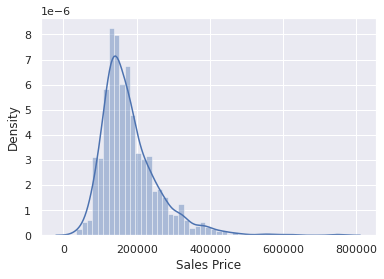

In [31]:
sns.set_theme()
sales_price_plot_data = pd.Series(data[0], name="Sales Price")
sales_price_plot = sns.distplot(sales_price_plot_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


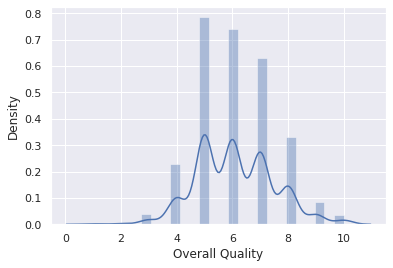

In [33]:
sns.set_theme()
OverallQual_plot_data = pd.Series(data[1], name="Overall Quality")
OverallQual_plot = sns.distplot(OverallQual_plot_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


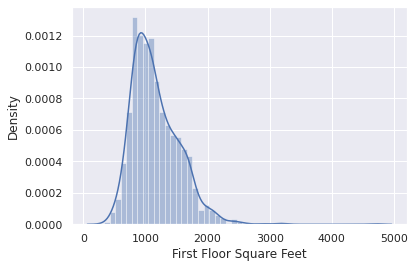

In [34]:
sns.set_theme()
FirstFlrSF_plot_data = pd.Series(data[2], name="First Floor Square Feet")
FirstFlrSF_plot = sns.distplot(FirstFlrSF_plot_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


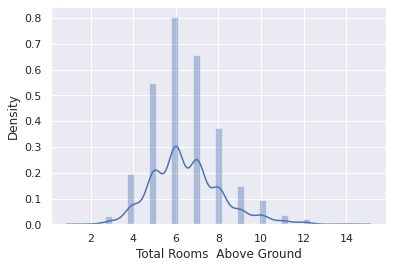

In [35]:
sns.set_theme()
TotRmsAbvGrd_plot_data = pd.Series(data[3], name="Total Rooms  Above Ground")
TotRmsAbvGrd_plot = sns.distplot(TotRmsAbvGrd_plot_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


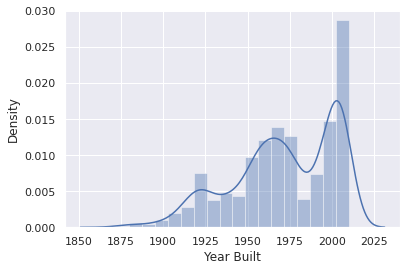

In [36]:
sns.set_theme()
YearBuilt_plot_data = pd.Series(data[4], name="Year Built")
YearBuilt_plot = sns.distplot(YearBuilt_plot_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


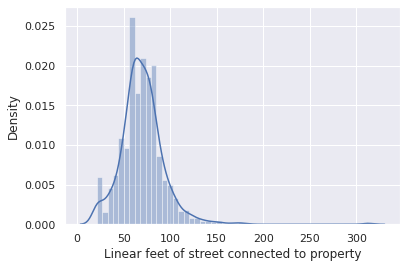

In [37]:
sns.set_theme()
LotFrontage_plot_data = pd.Series(data[5], name="Linear feet of street connected to property")
LotFrontage_plot = sns.distplot(LotFrontage_plot_data)

# **Correlación entre variables**

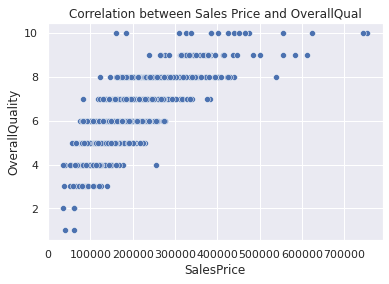

In [42]:
corrSaleQuality = sns.scatterplot(x=data[0], y=data[1], data=data)
corrSaleQuality.set_title("Correlation between Sales Price and OverallQual")
corrSaleQuality.set_xlabel("SalesPrice")
corrSaleQuality.set_ylabel("OverallQuality")


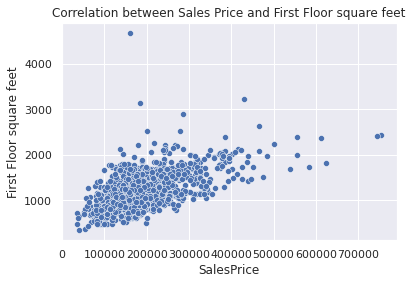

In [43]:
corrSale1stFlrSF = sns.scatterplot(x=data[0], y=data[2], data=data)
corrSale1stFlrSF.set_title("Correlation between Sales Price and First Floor square feet")
corrSale1stFlrSF.set_xlabel("SalesPrice")
corrSale1stFlrSF.set_ylabel("First Floor square feet")


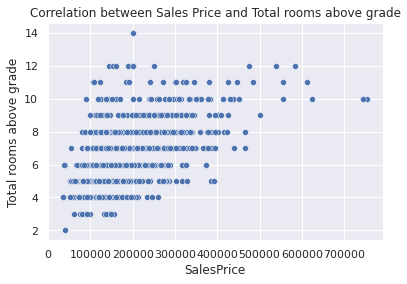

In [44]:
corrSaleTotRmsAbvGrd = sns.scatterplot(x=data[0], y=data[3], data=data)
corrSaleTotRmsAbvGrd.set_title("Correlation between Sales Price and Total rooms above grade")
corrSaleTotRmsAbvGrd.set_xlabel("SalesPrice")
corrSaleTotRmsAbvGrd.set_ylabel("Total rooms above grade")

Text(0, 0.5, 'Year Built')

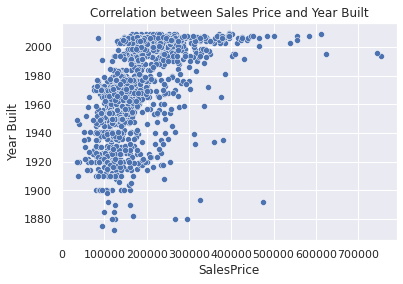

In [45]:
corrSaleYearBuilt= sns.scatterplot(x=data[0], y=data[4], data=data)
corrSaleYearBuilt.set_title("Correlation between Sales Price and Year Built")
corrSaleYearBuilt.set_xlabel("SalesPrice")
corrSaleYearBuilt.set_ylabel("Year Built")

Text(0, 0.5, 'Lot Frontage')

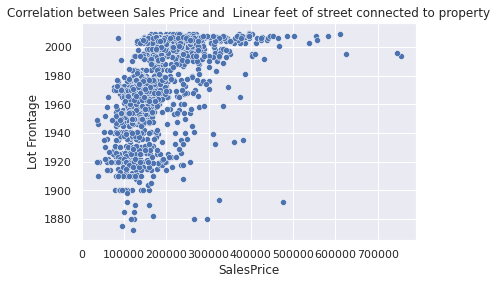

In [46]:
corrSaleLotFrontage= sns.scatterplot(x=data[0], y=data[4], data=data)
corrSaleLotFrontage.set_title("Correlation between Sales Price and  Linear feet of street connected to property")
corrSaleLotFrontage.set_xlabel("SalesPrice")
corrSaleLotFrontage.set_ylabel("Lot Frontage")